In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Memory @ 2 Buf

Different memory sizes do not have distinguishing differernces. Even not considering initial periods

How about more buffer?

In [6]:
file_list = ['./log/index_'+file+'.csv' for file in [
    "message_2016-6-7_2330_BW_M1600.log",
    "message_2016-6-7_2330_BW_M200.log",
    "message_2016-6-7_2330_BW_M400.log",
    "message_2016-6-7_2330_BW_M800.log",
#     "message_2016-6-6_2300_TQ_U16F4.log",
#     "message_2016-6-6_2300_TQ_U16F4_4.log",    
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-7_2330_BW_M1600.log.csv
./log/index_message_2016-6-7_2330_BW_M200.log.csv
./log/index_message_2016-6-7_2330_BW_M400.log.csv
./log/index_message_2016-6-7_2330_BW_M800.log.csv


In [4]:
ts_name = file_list
styles = ['-']*8
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

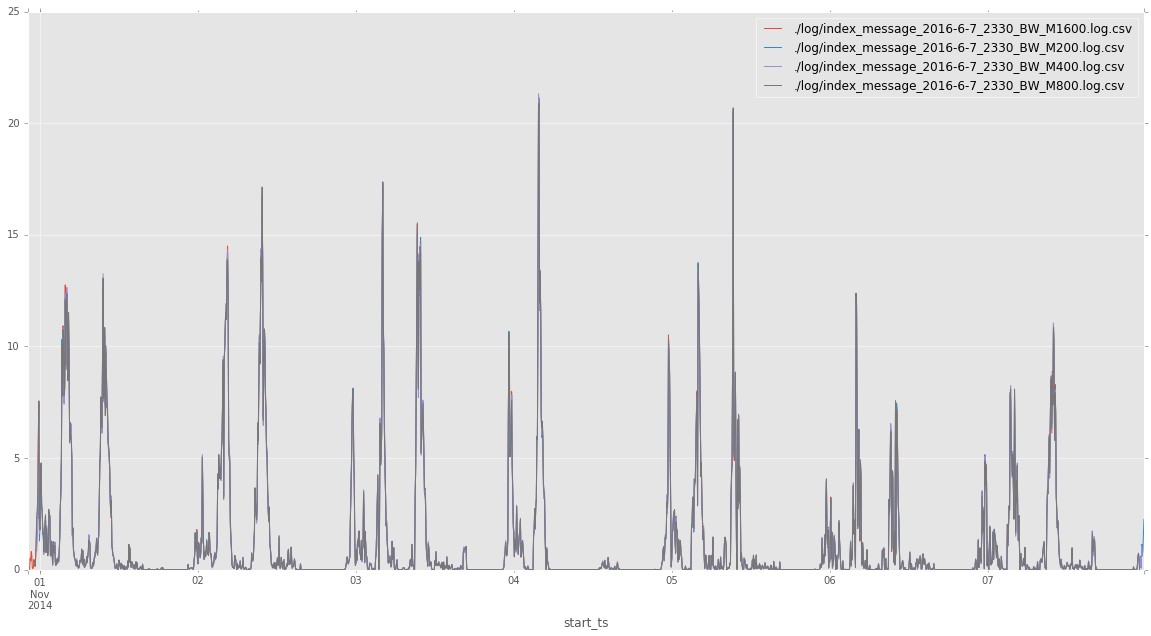

In [14]:
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.req_generated.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

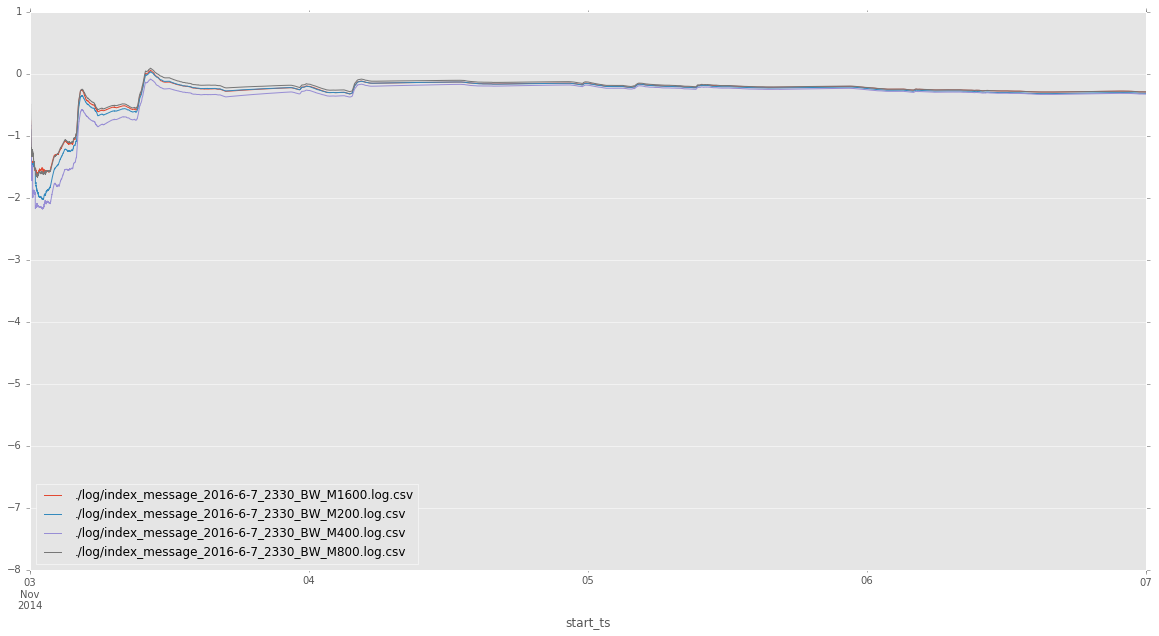

In [18]:
start = pd.to_datetime("2014-11-03 0:00:00")
end = pd.to_datetime("2014-11-07 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
    df = df.loc[start:end]
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
#             ylim=(-1, 0),
           )

# Phi

No noticible difference

In [21]:
file_list = ['./log/index_'+file+'.csv' for file in [
    "message_2016-6-7_2330_BW_P1.log",
    "message_2016-6-7_2330_BW_P5.log",
    "message_2016-6-7_2330_BW_M200.log",
    "message_2016-6-7_2330_BW_P25.log",
    "message_2016-6-7_2330_BW_P125.log",   
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-7_2330_BW_P1.log.csv
./log/index_message_2016-6-7_2330_BW_P5.log.csv
./log/index_message_2016-6-7_2330_BW_M200.log.csv
./log/index_message_2016-6-7_2330_BW_P25.log.csv
./log/index_message_2016-6-7_2330_BW_P125.log.csv


In [22]:
ts_name = file_list
styles = ['-']*8
start = pd.to_datetime("2014-09-29 12:00:00")
end = pd.to_datetime("2014-09-30 00:00:00")
delta = pd.Timedelta('2 seconds')

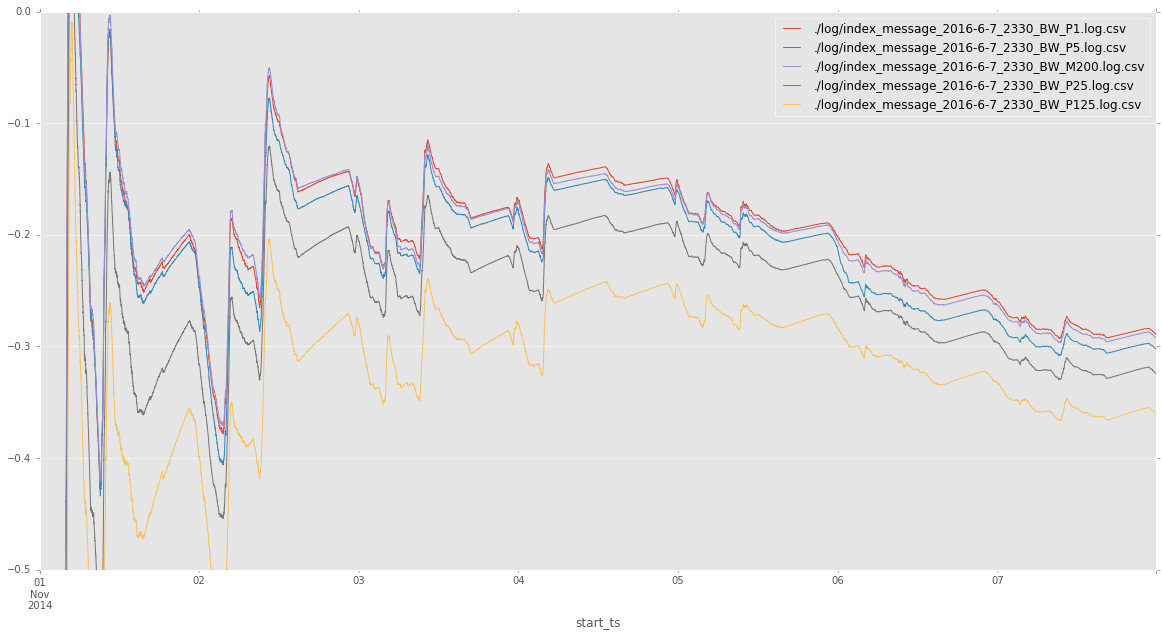

In [26]:
start = pd.to_datetime("2014-11-01 0:00:00")
end = pd.to_datetime("2014-11-08 00:00:00")
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
    df = df.loc[start:end]
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
            ylim=(-0.5, 0),
           )

# Gamma

Larger gamma needs larger scaling .9 ~ 80 .99>80

Increasing gamma doesn't help increase reward. But learning is slower

In [40]:
file_list = ['./log/index_'+file+'.csv' for file in [
"message_2016-6-6_2300_TQ_U16F4.log",
# "message_2016-6-7_2335_TQ_G99R10.log",
# "message_2016-6-7_2335_TQ_G99R40.log",
"message_2016-6-7_2335_TQ_G99R80.log",
"message_2016-6-7_2335_TQ_G9R10.log",
# "message_2016-6-7_2335_TQ_G9R20.log",
"message_2016-6-7_2335_TQ_G9R40.log",
"message_2016-6-7_2335_TQ_G9R80.log",  
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-6_2300_TQ_U16F4.log.csv
./log/index_message_2016-6-7_2335_TQ_G99R80.log.csv
./log/index_message_2016-6-7_2335_TQ_G9R10.log.csv
./log/index_message_2016-6-7_2335_TQ_G9R40.log.csv
./log/index_message_2016-6-7_2335_TQ_G9R80.log.csv


In [41]:
ts_name = file_list
styles = ['-']*8
start = pd.to_datetime("2014-9-2 0:00:00")
end = pd.to_datetime("2014-11-08 00:00:00")
delta = pd.Timedelta('2 seconds')

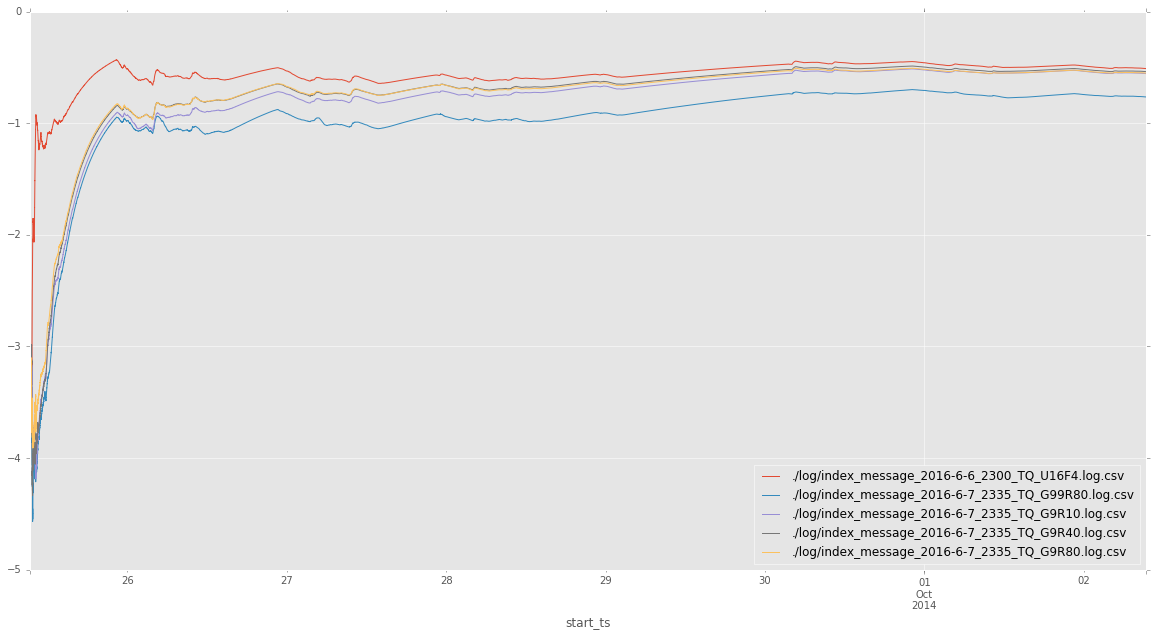

In [42]:
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
#     df = df.loc[start:end]
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
            ylim=(-5, 0),
           )

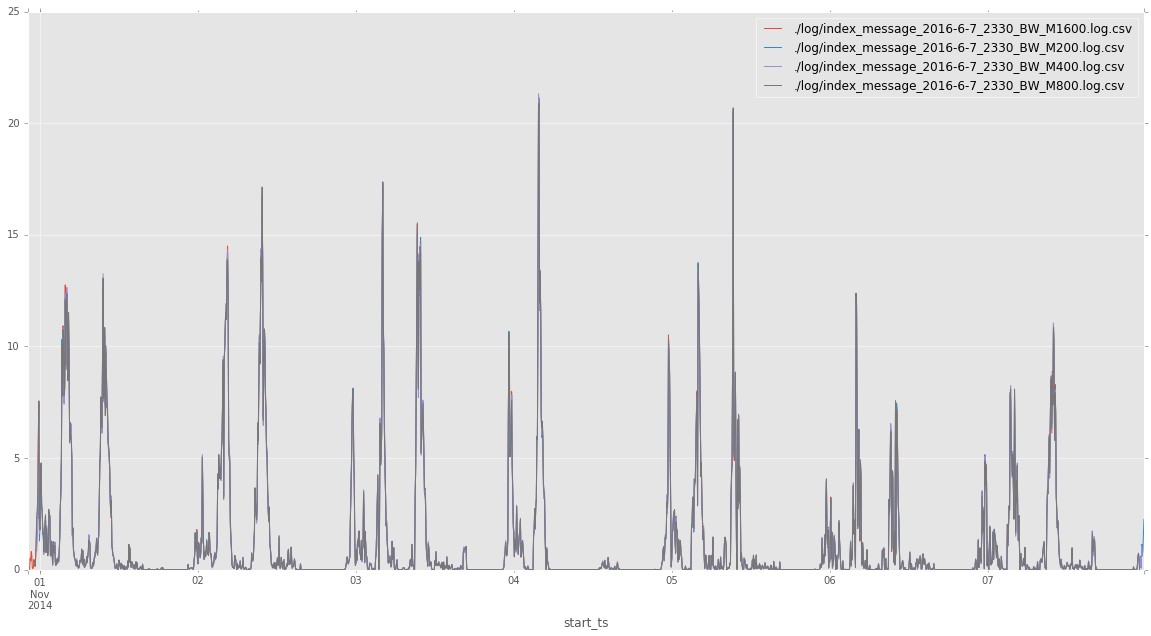

In [14]:
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.req_generated.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

# Adaptive Rs

fast RS update prevents signal from propagating back?

Insufficient exploration?

In [55]:
file_list = ['./log/index_'+file+'.csv' for file in [
"message_2016-6-6_2300_TQ_U16F4.log",
"message_2016-6-7_2335_TQ_AR1.log",
"message_2016-6-7_2335_TQ_AR1_2.log",
"message_2016-6-7_2335_TQ_AR10.log",
# "message_2016-6-7_2335_TQ_AR20.log",
# "message_2016-6-7_2335_TQ_AR40.log",
# "message_2016-6-7_2335_TQ_AR120.log",
]]
df_list = [pd.read_csv(f, delimiter=';', index_col=0) for f in file_list]
for i, df in enumerate(df_list):
    df.loc[:, 'start_ts'] = df['start_ts'].apply(lambda x: pd.to_datetime(x))
    df.set_index('start_ts', inplace=True)
    df['total_reward'] = df['tr_reward'] - df['op_cost']
    print file_list[i]

./log/index_message_2016-6-6_2300_TQ_U16F4.log.csv
./log/index_message_2016-6-7_2335_TQ_AR1.log.csv
./log/index_message_2016-6-7_2335_TQ_AR1_2.log.csv
./log/index_message_2016-6-7_2335_TQ_AR1_3.log.csv
./log/index_message_2016-6-7_2335_TQ_AR10.log.csv


In [57]:
ts_name = file_list
styles = ['-']*8
start = pd.to_datetime("2014-9-2 0:00:00")
end = pd.to_datetime("2014-11-08 00:00:00")
delta = pd.Timedelta('2 seconds')

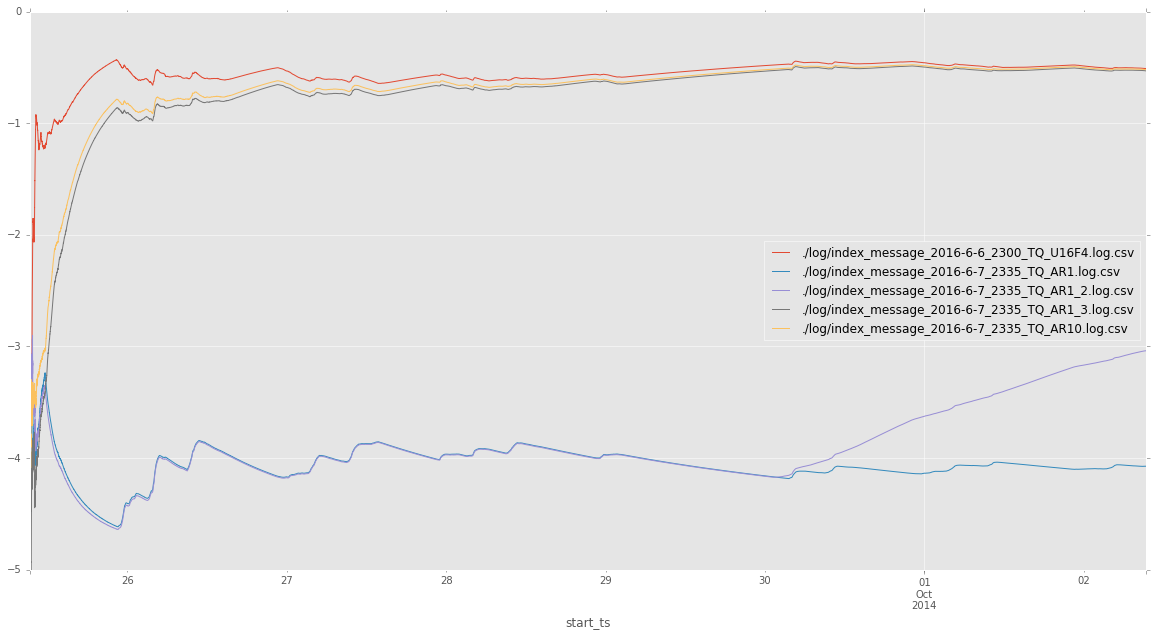

In [58]:
delta = pd.Timedelta('2 seconds')
plt.figure(2)
ax = plt.subplot(111)
ts_list = []
for i, df in enumerate(df_list):
#     df = df.loc[start:end]
    step = (df.index-df.index[0])/delta+1
    ts = df['total_reward'].cumsum()/step
#     ts.index = pd.Index(step)
    ts_list.append(ts)
for i, ts in enumerate(ts_list):
    ts_diff = ts #-ts_list[-1]
    ts_diff.name = ts_name[i]
    ts_diff.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logy=True,
            style=styles[i], 
            ylim=(-5, 0),
           )

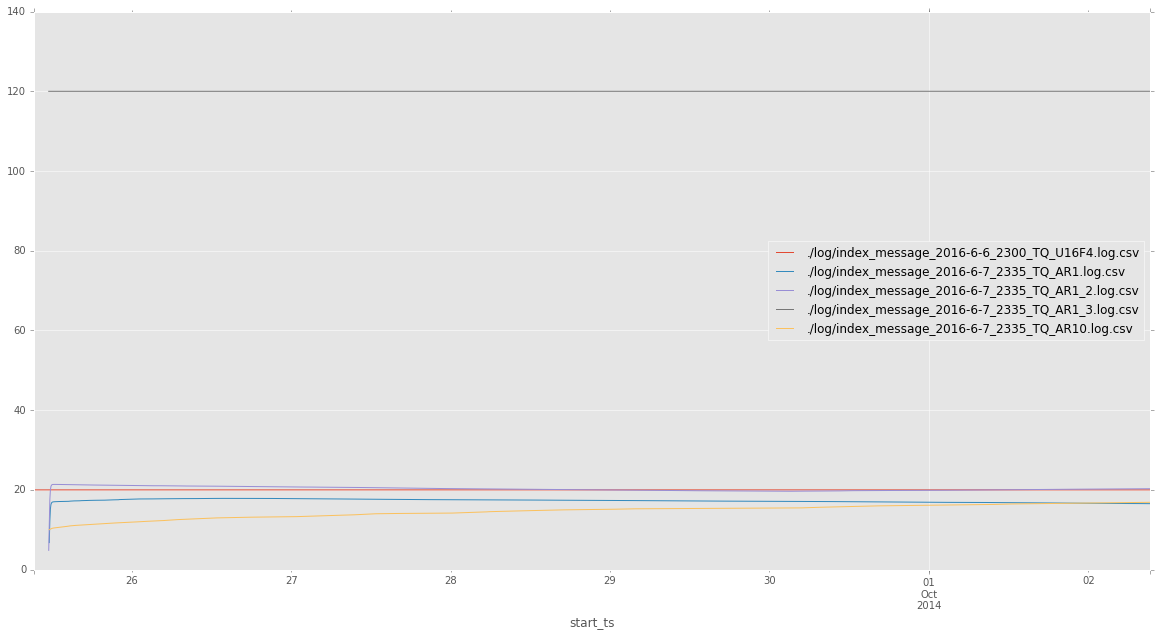

In [59]:
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.reward_scaling.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
#             logx=True,
            style=styles[i], 
#             ylim=(-0.6, -0.4),
           )

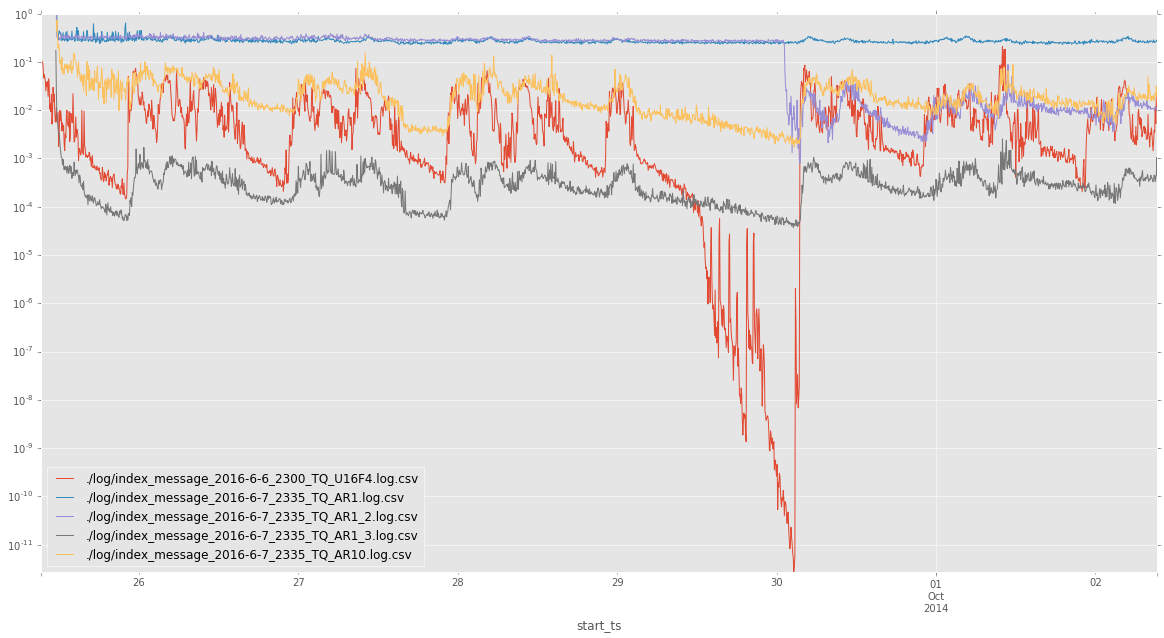

In [60]:
plt.figure(1)
ax = plt.subplot(111)
for i, df in enumerate(df_list):
    ts = df.loss.resample('0.5Min')
    step = (ts.index-ts.index[0])/delta+1
    ts.name = ts_name[i]
#     ts.index = pd.Index(step)
    ts.plot(figsize=(20, 10), legend=True, ax=ax, 
            logy=True,
            style=styles[i], 
            ylim=(0, 1),
           )